In [38]:
import os
import numpy as np                                                                               # Importing numpy for Matrix Operations
import pandas as pd                                                                              # Importing pandas to read CSV files
import matplotlib.pyplot as plt                                                                  # Importting matplotlib for Plotting and visualizing images
import math
import cv2                                                                                       # Importing openCV for image processing
import seaborn as sns                                                                            # Importing seaborn to plot graphs


# Tensorflow modules
import tensorflow as tf
import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator                              # Importing the ImageDataGenerator for data augmentation
from tensorflow.keras.models import Sequential                                                   # Importing the sequential module to define a sequential model
from tensorflow.keras.layers import Dense,Dropout,Flatten,Conv2D,MaxPooling2D,BatchNormalization # Defining all the layers to build our CNN Model
from tensorflow.keras.optimizers import Adam,SGD                                                 # Importing the optimizers which can be used in our model
from sklearn import preprocessing                                                                # Importing the preprocessing module to preprocess the data
from sklearn.model_selection import train_test_split                                             # Importing train_test_split function to split the data into train and test
from sklearn.metrics import confusion_matrix                                                     # Importing confusion_matrix to plot the confusion matrix

# Display images using OpenCV

# Ignore warnings
import warnings
warnings.filterwarnings('ignore')
# Mount Google drive to access the dataset (monkeys_dataset.zip)
import zipfile
import csv
import pickle
from sklearn.preprocessing import LabelBinarizer
enc = LabelBinarizer()

In [39]:
path = "images/"
file_names = []
# iterate through the names of contents of the folder
for image_path in os.listdir(path):
    if os.path.isfile(os.path.join(path, image_path)):
        input_path = os.path.join(path, image_path)
        file_names.append(input_path)
print(len(file_names))



4


In [40]:
images = []
for x in file_names:
    img = cv2.imread(x)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    images.append(img)


In [48]:
for img in images:
    img = np.expand_dims(img, axis = 0)
images[0].shape

(225, 225, 3)

In [42]:
model= tf.keras.models.load_model("model.h5")


In [43]:
def scale_resize_image(image):
    image = tf.image.convert_image_dtype(image, tf.float32) # equivalent to dividing image pixels by 255
    image = tf.image.resize(image, (128, 128)) # Resizing the image to 224x224 dimention
    return image
resized_images = []
for x in images:
    x=scale_resize_image(x)
    resized_images.append(x)


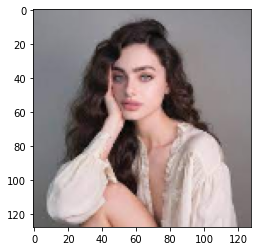

In [47]:
plt.imshow(resized_images[0])

In [45]:
resized_images = np.array(resized_images)

In [46]:
pred = model.predict(resized_images)
for x in pred:
    if x > .000001:
        print("male")
    else:
        print("female")
print(pred)


male
male
female
female
[[9.7624770e-06]
 [6.9511533e-03]
 [3.5518196e-11]
 [8.1015975e-07]]
